## Covid-19 Infection - Indian states

*Install basemap*

In [56]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756024 sha256=76148de3917a81dba9ec48b1f5d14b1b2e3a25f64476170ddbcdf220349ee3fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-2s0c8t8p/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


*Required libraries*

In [0]:
from __future__ import division
import ossaudiodev
import pandas as pd
from itertools import groupby
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math
import os

*Load csv and organize data*

In [0]:
# Load data
data = pd.read_csv("india-covid-19.csv")

# Group the data state-wise
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding infection rate
affected_rate = []
# Population of india
total_pop=1350000000

for key , group in states_group:
    infected_people = 0
    for row in group.iterrows():
        infected_people += row[1][1]
    
    # Calculate percent, I just trying in 10000000
    rate = (infected_people/total_pop)*10000000
    affected_rate.append((key,rate))

*Create map shape*

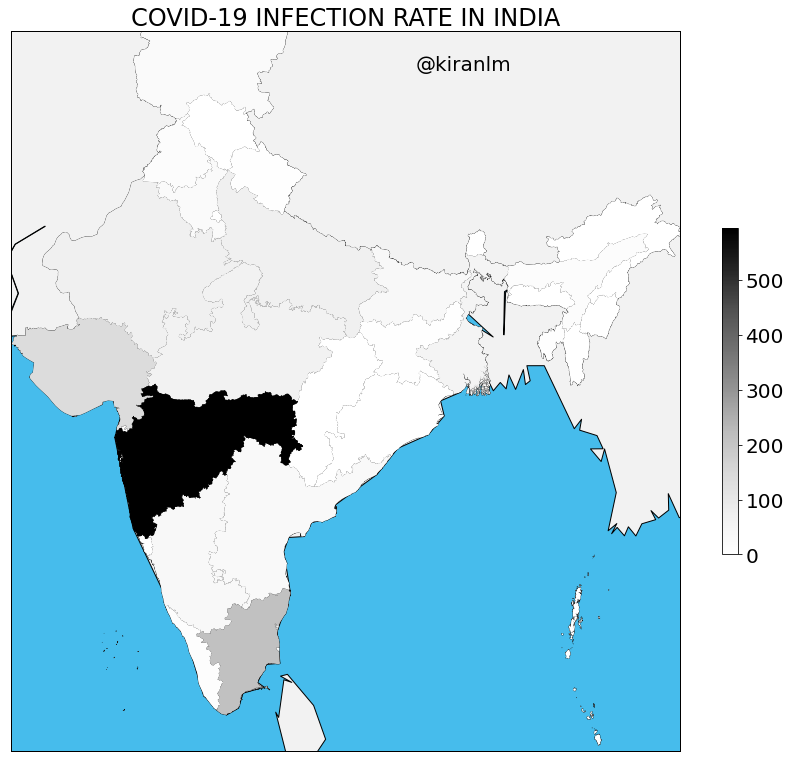

In [65]:
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

# Load the shape file of India
m.readshapefile(os.getcwd()+"/shape/INDIA","INDIA")

# An empty list to hold infection rates
aff_rate = []
for state_info in m.INDIA_info:
    state = state_info['ST_NAME'].upper()
    rate = 0
    
    # In affected_rate (containing tuples of state name and infection rates), search for state 'state'
    # Append its corresponding count rate to aff_rate
    for x in affected_rate:
        if x[0].upper() == state:
            rate = x[1]
            break
    aff_rate.append(rate)
    
# A dataframe containing shapes, state names and rates    
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'aff_rate' : aff_rate
    })

# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Colormap
cmap = plt.get_cmap('Greys')   
# A patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the infection rate of the state
pc.set_facecolor(cmap(norm(df_poly['aff_rate'].fillna(0).values)))
ax.add_collection(pc)

# A mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(aff_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("COVID-19 INFECTION RATE IN INDIA")
plt.figtext(0.5,0.8,'@kiranlm')
# Change plot size and font size
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 20})
plt.show()